In [22]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import sklearn.metrics as metrics

Read a given expression data matrix

In [13]:
data_file = f"data/100_mr_50_cond/simulated_noNoise.txt"  #5 or 40 or 100

data = pd.read_csv(data_file, sep="\t", header=0)

Inspect matrix (missing values, summary stats) gene-wise

In [14]:
# Check for missing values
missing_values = data.isnull().sum()
missing_values

0      0
1      0
2      0
3      0
4      0
      ..
195    0
196    0
197    0
198    0
199    0
Length: 200, dtype: int64

In [15]:
# check summary statistics by colum
data.describe()

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,...,50.000000,50.000000,50.000000,50.000000,50.00000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,3.483616,3.578688,6.369580,4.786366,5.467940,5.917240,6.284340,2.466574,6.448160,4.038360,...,3.141000,8.146400,7.598000,7.576200,7.33580,9.277600,10.144600,10.021600,7.960400,7.281800
std,1.781800,2.031314,3.040953,2.430499,2.568214,2.602281,3.276548,1.303116,3.814274,2.345663,...,0.793037,1.817968,2.885936,2.398968,2.61434,2.712069,1.989103,3.832033,3.060829,2.204591
min,0.089800,0.053400,0.729000,0.014300,0.247000,0.672000,0.225000,0.044700,0.000000,0.638000,...,1.780000,4.990000,1.110000,2.660000,2.61000,3.370000,6.610000,1.150000,1.130000,2.800000
25%,2.077500,2.217500,4.082500,2.870000,4.165000,3.855000,3.875000,1.677500,3.485000,2.120000,...,2.560000,6.650000,5.617500,5.952500,5.37250,7.442500,8.580000,7.732500,5.470000,5.725000
50%,3.795000,3.530000,6.560000,4.395000,5.555000,5.940000,6.865000,2.380000,5.945000,3.710000,...,3.055000,8.120000,7.430000,7.705000,7.35500,9.505000,9.945000,10.750000,8.135000,7.080000
75%,4.795000,4.985000,8.882500,6.987500,7.210000,8.060000,8.787500,3.267500,9.445000,5.580000,...,3.635000,9.420000,9.792500,9.165000,9.20750,11.400000,11.950000,12.875000,10.300000,8.800000
max,6.500000,7.760000,11.700000,8.110000,11.200000,11.200000,11.700000,5.200000,13.800000,9.370000,...,6.260000,11.600000,13.400000,12.500000,12.60000,15.000000,13.800000,17.000000,14.100000,12.800000


Plot Correlation matrix

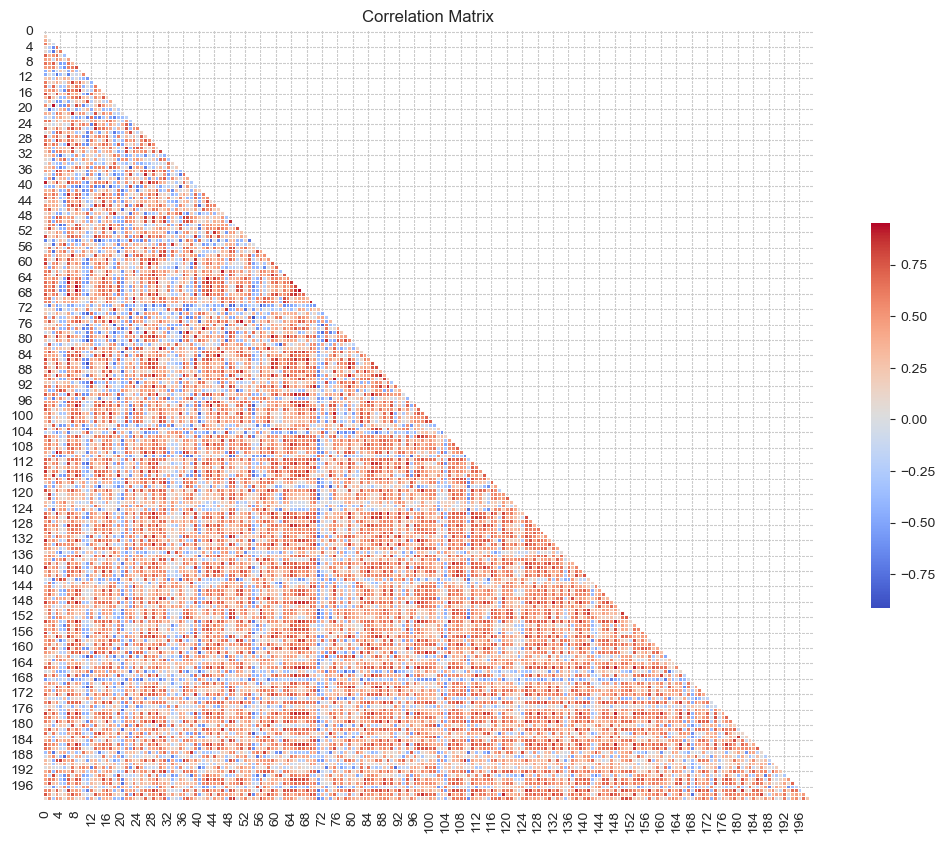

In [36]:
corr_mat = data.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr_mat, dtype=bool))

# Visualize correlation matrix
plt.figure(figsize=(15, 10))
sns.heatmap(corr_mat, annot=False, cmap='coolwarm', linewidths=.5, square=True,
            mask = mask, cbar_kws={"drawedges": False, "shrink": .5})
plt.title('Correlation Matrix')
plt.show()


Normalize the data and double-check the variance

In [27]:
# unit-variance normalization per-gene, i.e., the expression data across all conditions will have variance=1
data_n = pd.DataFrame(StandardScaler(with_mean=False).fit_transform(data.to_numpy()))

# check summary statistics by colum
data_n.describe()

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,...,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,1.974959,1.779646,2.115866,1.989287,2.150699,2.296952,1.937448,1.912045,1.707697,1.739107,...,4.000936,4.526541,2.659498,3.190171,2.834473,3.455588,5.151866,2.641768,2.627138,3.336550
std,1.010153,1.010153,1.010153,1.010153,1.010153,1.010153,1.010153,1.010153,1.010153,1.010153,...,1.010153,1.010153,1.010153,1.010153,1.010153,1.010153,1.010153,1.010153,1.010153,1.010153
min,0.050910,0.026555,0.242161,0.005943,0.097152,0.260857,0.069367,0.034651,0.000000,0.274753,...,2.267325,2.772690,0.388529,1.120067,1.008475,1.255209,3.356844,0.303149,0.372929,1.282971
25%,1.177793,1.102741,1.356137,1.192816,1.638215,1.496433,1.194654,1.300368,0.922949,0.912972,...,3.260871,3.695068,1.966271,2.506466,2.075875,2.772076,4.357295,2.038345,1.805241,2.623218
50%,2.151492,1.755434,2.179120,1.826629,2.184942,2.305787,2.116464,1.844934,1.574443,1.597700,...,3.891391,4.511872,2.600693,3.244405,2.841892,3.540286,5.050501,2.833780,2.684760,3.244084
75%,2.718420,2.478991,2.950615,2.904111,2.835901,3.128728,2.709167,2.532908,2.501365,2.403010,...,4.630183,5.234216,3.427630,3.859179,3.557677,4.246109,6.068726,3.393946,3.399266,4.032195
max,3.685032,3.858971,3.886540,3.370639,4.405283,4.347612,3.607084,4.030948,3.654720,4.035162,...,7.973849,6.445532,4.690349,5.263474,4.868502,5.586985,7.008236,4.481327,4.653364,5.865011
